<a href="https://colab.research.google.com/github/mechworrior/FreeCodeCamp-Pandas-Real-Life-Example/blob/master/time_series_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment
For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.

In [ ]:
df = pd.read_csv("/content/fcc-forum-pageviews.csv", index_col='date', parse_dates = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [ ]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [ ]:
df=df[(df['value']>=df['value'].quantile(.025)) & (df['value']<=df['value'].quantile(.975))]
df

,value
date,
2016-06-17,21691
2016-06-18,21681
2016-06-20,28508
2016-06-21,26805
2016-06-25,21923
...,...
2019-11-03,130118
2019-11-09,115642
2019-11-10,117717


Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

[Text(0, 0.5, 'Page Views'), Text(0.5, 0, 'Date')]

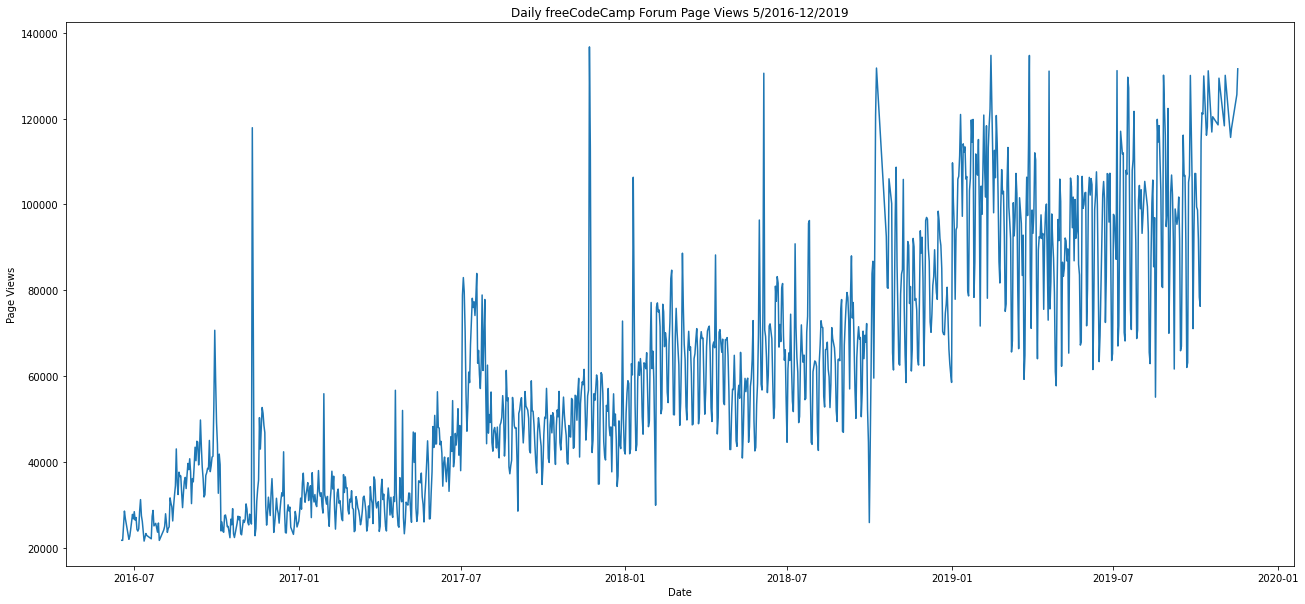

In [ ]:
# Draw line plot
fig, ax= plt.subplots(figsize=(22, 10))
ax=sns.lineplot(data=df,x='date',y='value')
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set(xlabel="Date",ylabel='Page Views')
# Save image and return fig (don't change this part)
#fig.savefig('line_plot.png')



Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

In [ ]:
df_bar = df.reset_index()
df_bar['year'] = df_bar['date'].dt.year
df_bar['month']= df_bar['date'].dt.month
df_bar = df_bar.drop('date',axis =1)
df_bar.melt(id_vars=['year','month']) 
df_bar.groupby(['year','month'], as_index=False)['value'].mean()

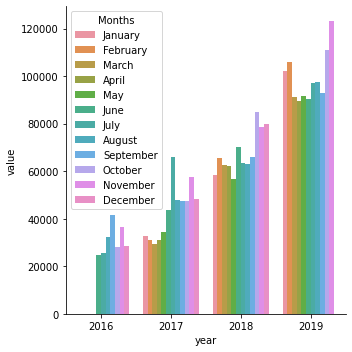

In [ ]:
 fig = sns.catplot(
        data=df_bar,
        x="year",
        y="value",
        hue="month",
        kind="bar",
        ci=None,
        legend=False
        )
 plt.legend(title='Months', labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
 plt.xlabel('Years')
 plt.ylabel('Average Page Views')

Create a draw_box_plot function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

In [ ]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,year,month
0,2016-06-17,21691,2016,Jun
1,2016-06-18,21681,2016,Jun
2,2016-06-20,28508,2016,Jun
3,2016-06-21,26805,2016,Jun
4,2016-06-25,21923,2016,Jun
...,...,...,...,...
1171,2019-11-03,130118,2019,Nov
1172,2019-11-09,115642,2019,Nov
1173,2019-11-10,117717,2019,Nov
1174,2019-11-16,125634,2019,Nov


[Text(0, 0.5, 'Page Views'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')]

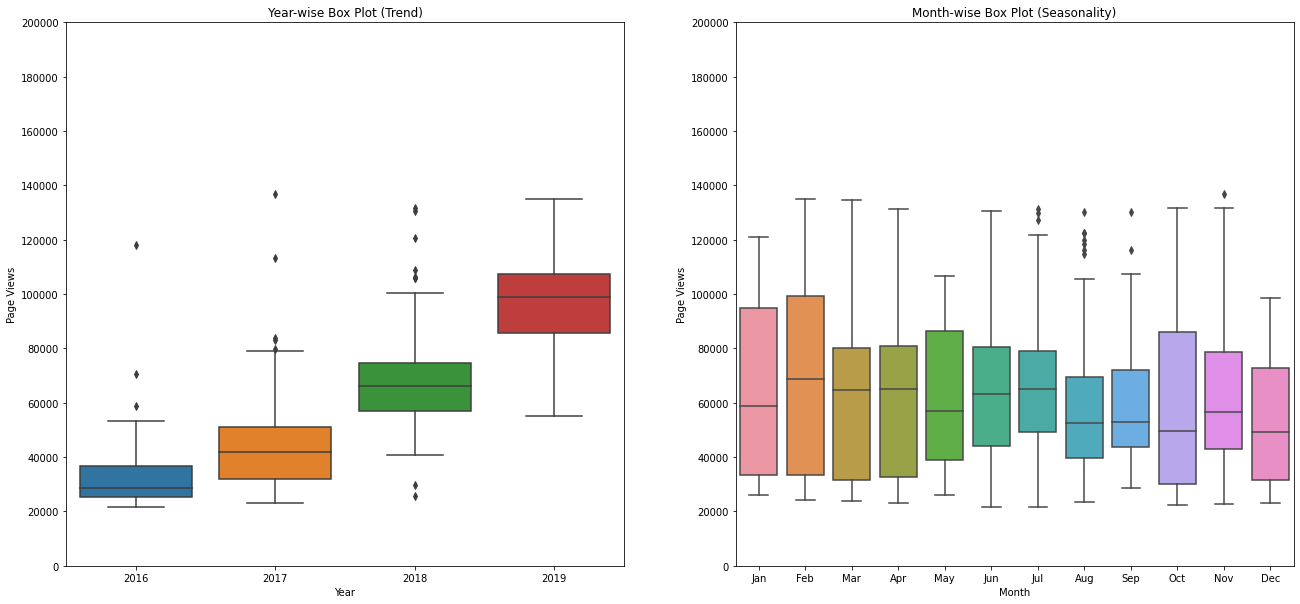

In [ ]:
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 10))
    sns.boxplot(ax = ax1 , x= 'year', y = 'value', data=df_box)
    sns.boxplot(ax = ax2 , x= 'month', y = 'value', data=df_box, order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax1.set_ylim(0, 200000)
    ax2.set_ylim(0, 200000)
    ax1.set_yticks(range(0,200001,20000))
    ax2.set_yticks(range(0,200001,20000))
    ax1.set(xlabel='Year',ylabel='Page Views',title="Year-wise Box Plot (Trend)")
    ax2.set(xlabel='Month',ylabel='Page Views',title="Month-wise Box Plot (Seasonality)")